In [2]:
!pip install spacy

     ---------------------------------------- 12.2/12.2 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 481.4/481.4 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 48.9/48.9 kB 309.0 kB/s eta 0:00:00
     -------------------------------------- 56.8/56.8 kB 494.9 kB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.5
    Uninstalling colorama-0.4.5:
      Successfully uninstalled colorama-0.4.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-client 1.11.0 requires six>=1.15.0, but you have six 1.12.0 which is incompatible.


In [9]:
import spacy
import os,re
from spacy.matcher import Matcher
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
import docx2txt

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [10]:
file_path = r'C:\Users\pc\Documents\Project\DS Project\P-201\directory to extract\Resumes/'
doc_file = []
pdf_file = []
docx_file = []
folder_name = []
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [11]:
print('Number of .doc files = {}'.format(len(doc_file)),'\n'
     'Number of .pdf files = {}'.format(len(pdf_file)),'\n'
     'Number of .docx files = {}'.format(len(docx_file)))

Number of .doc files = 26 
Number of .pdf files = 1 
Number of .docx files = 52


In [12]:
len(docx_file)+len(doc_file)+len(pdf_file)

79

In [13]:
%matplotlib inline

In [14]:
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

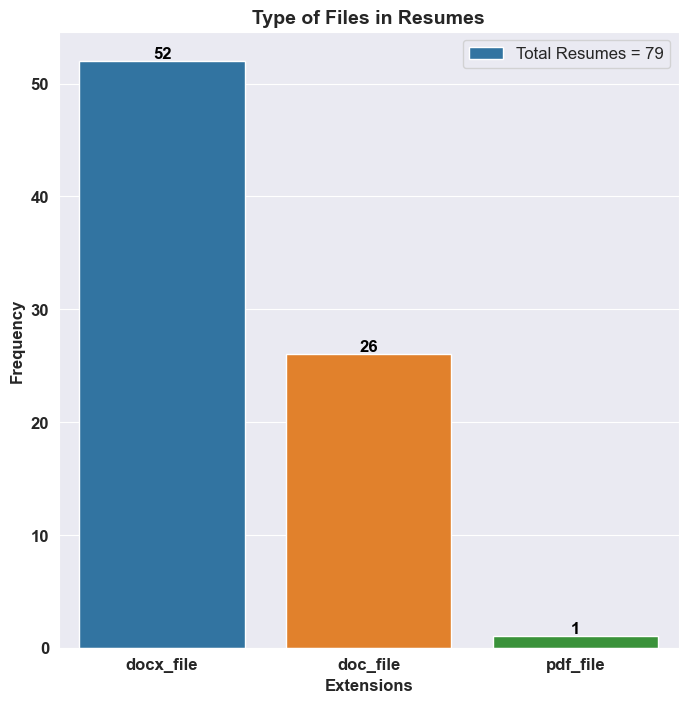

In [15]:
f, axe = plt.subplots(1,1, figsize=(8,8), dpi=100)
ax = sns.barplot(x=['docx_file','doc_file','pdf_file'], y=[len(docx_file),len(doc_file),len(pdf_file)], ax = axe
            ,label='Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))
axe.set_xlabel('Extensions', size=12,fontweight = 'bold')
axe.set_ylabel('Frequency', size=12,fontweight = 'bold')
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=12,fontweight = 'bold')
plt.legend(loc='best', fontsize  = 'large')
plt.title('Type of Files in Resumes', fontsize = 14, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
plt.show()

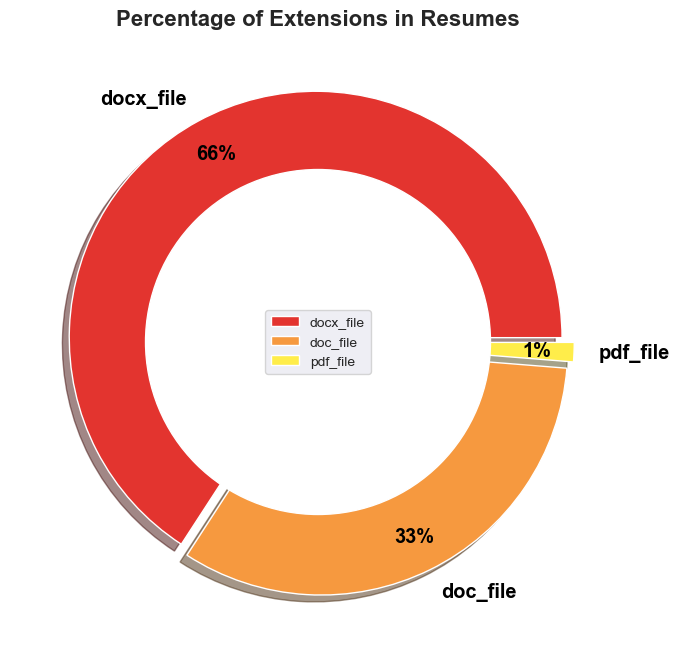

In [16]:
plt.figure(figsize=(12,8), dpi = 100)
# Setting size in Chart based on 
# given values

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
  
# Setting labels for items in Chart
labels = ['docx_file','doc_file','pdf_file']
  
# colors
colors = ['#e3342f', '#f6993f', '#ffed4a']
  
# explosion
explode = (0.02, 0.03, 0.04)
  
# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.0f%%', shadow=True,
        pctdistance=0.85, 
        explode=explode,
        startangle=0,
        textprops = {'size':'x-large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Percentage of Extensions in Resumes', fontsize = 16, fontweight = 'bold')
  
# Add Legends
plt.legend(labels, loc="center")
  
# Displaying Chart

plt.show()

In [29]:
import os,re

file_path = r'C:\Users\pc\Documents\Project\DS Project\P-201\directory to extract\Resumes/'
file_name = []
profile = []
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if  file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)

In [18]:
import pandas as pd
import numpy as np

data = pd.DataFrame()
data['Resumes'] = file_name
data['Profile'] = profile
data

,Resumes,Profile
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft resumes
1,Peoplesoft Admin_G Ananda Rayudu.docx,Peoplesoft resumes
2,Peoplesoft Admin_Gangareddy.docx,Peoplesoft resumes
3,Peoplesoft Admin_Murali.docx,Peoplesoft resumes
4,Peoplesoft Admin_Priyanka Ramadoss.docx,Peoplesoft resumes
...,...,...
73,Sri Krishna S_Hexaware.docx,workday resumes
74,Srikanth-Hexaware.docx,workday resumes
75,SSKumar_Hexaware.docx,workday resumes
76,Venkateswarlu B_Hexaware.docx,workday resumes


In [19]:
data.Profile.value_counts().index

Index(['React JS', 'workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight'],
      dtype='object')

In [20]:
data.Profile.value_counts()

React JS                           23
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: Profile, dtype: int64

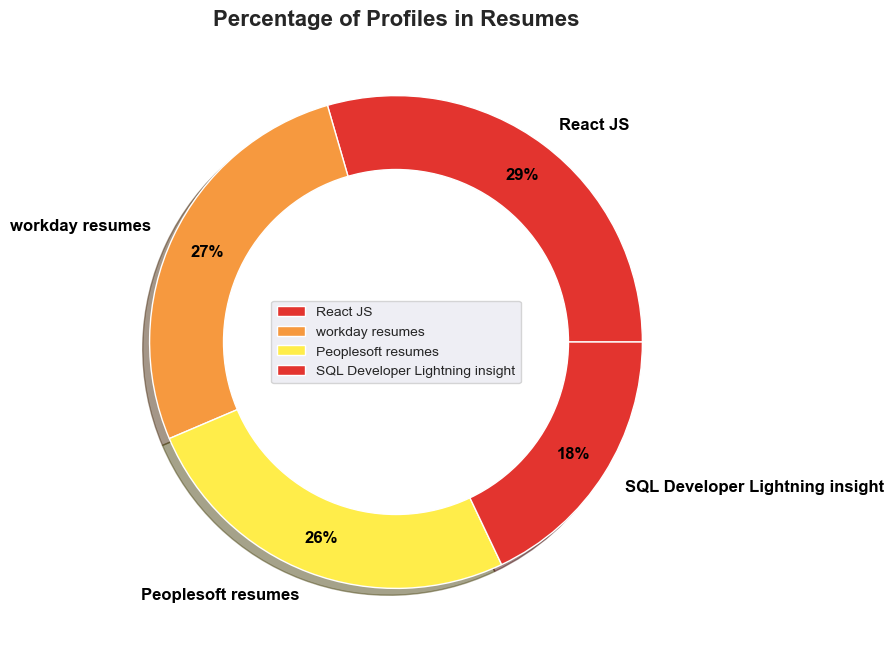

In [21]:
plt.figure(figsize=(12,8),dpi=100) 
# Setting size in Chart based on 
# given values

sizes = data.Profile.value_counts()
  
# Setting labels for items in Chart
labels = data.Profile.value_counts().index
  
# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.0f%%', shadow=True,
        pctdistance=0.85, 
        startangle=0,
        textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Percentage of Profiles in Resumes', fontsize = 16, fontweight = 'bold')
  
# Add Legends
plt.legend(labels, loc="center")
  
# Displaying Chart

plt.show()

In [22]:
import os,re
import pandas as pd
import numpy as np

In [2]:
import textract

In [3]:
os.listdir(r'C:\Users\pc\Documents\Project\DS Project\P-201\Resumes-20220812T140008Z-001 (1)\Resumes')

['Internship_Ravali_Musquare Technologies (1).docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'Peoplesoft resumes',
 'React Developer_Deepakreddy.docx',
 'React Developer_Haripriya.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_Naveen sadhu.docx',
 'React Developer_PavasGoswami.docx',
 'React Developer_Pragnya.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'React Developer_Thirupathiamma.docx',
 'React Developer_Vinay Reddy.docx',
 'React Dev_Krishna Kanth.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'React JS Developer_AnjaniPriyadarshini.docx',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Reactjs Developer_Praba

In [4]:
file_path = []
category = []
directory = r'C:\Users\pc\Documents\Project\DS Project\P-201\Resumes-20220812T140008Z-001 (1)\Resumes'
for i in os.listdir(directory):
  if i.endswith('.docx'):
    os.path.join(directory, i)
    file_path.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
    category.append('React JS Developer Resume')

In [5]:
file_path, category

(['Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \

In [6]:
file_path_1 = []
category_1 = []
directory_1= r'C:\Users\pc\Documents\Project\DS Project\P-201\Resumes-20220812T140008Z-001 (1)\Resumes\Peoplesoft resumes'
for i in os.listdir(directory_1):
  if i.endswith('.docx'):
    os.path.join(directory_1, i)
    file_path_1.append((textract.process(os.path.join(directory_1, i))).decode('utf-8'))
    category_1.append('Peoplesoft Resume')

In [7]:
file_path_1, category_1

(['Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nMan

In [8]:
file_path_2 = []
category_2 = []
directory_2= r'C:\Users\pc\Documents\Project\DS Project\P-201\Resumes-20220812T140008Z-001 (1)\Resumes\SQL Developer Lightning insight'
for i in os.listdir(directory_2):
  if i.endswith('.docx'):
    os.path.join(directory_2, i)
    file_path_2.append((textract.process(os.path.join(directory_2, i))).decode('utf-8'))
    category_2.append('SQL Developer Resume')

In [9]:
file_path_2 , category_2

(['ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Developer   \n\n\n\n\t\t\n\n\n\nSummary\n\n\n\n2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.\n\nExpertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.\n\nHandled data manipulation and data consistency by creating Views, Triggers, and Synonyms.\n\nHands on experience in creation, optimization and debugging Stored Procedure and Functions.\n\nFamiliar in writing queries using CTE, Temporary Tables and Table Variables.\n\nGood experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.\n\nExperience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.\n\nWorked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.\n\nUsed 

In [10]:
file_path_3 = []
category_3 = []
directory_3 = r'C:\Users\pc\Documents\Project\DS Project\P-201\Resumes-20220812T140008Z-001 (1)\Resumes\workday resumes'
for i in os.listdir(directory_3):
  if i.endswith('.docx'):
    os.path.join(directory_3, i)
    file_path_3.append((textract.process(os.path.join(directory_3, i))).decode('utf-8'))
    category_3.append('Workday Resume')

In [11]:
file_path_3, category_3

(['Chinna Subbarayudu M\n\nDOB: 06th March 1994\n\nNationality: Indian\n\n\t\t\n\n\t\t\tPROFILE SUMMARY:\n\n\n\n\n\n\n\nHaving around 5.1 years of IT experience in developing and Implementation of ERP technology by using Workday HCM and ETL (informatica) technologies.\n\n3.6 years of experience as Workday Integration Consultant and involved in a maintenance and implementation.\n\nExperience in all phases in Workday like requirements gathering, Analysis, Design, Development and Testing.\n\nHands on experience in inbound/ outbound integrations using core connector, Workday studio, managing business processes, working with EIB, report writer.\n\nDeveloped and maintained custom-report types (Advanced, Matrix, Composite) using report writer tool.\n\nInvolved in transformation of XML into XSLT for presenting data for different web Services.\n\nBuilding Workday Integration (EIB), calculated fields, Custom Reports and Writing XSLT transformation code.\n\nDeveloped testing\xa0strategies and val

In [13]:
data_1 = pd.DataFrame(data = file_path , columns = ['Resumes'])
data_1['Profile'] = category
data_1

,Resumes,Profile
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
6,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume


In [14]:
data_2 = pd.DataFrame(data = file_path_1 , columns = ['Resumes'])
data_2['Profile_1'] = category_1
data_2

,Resumes,Profile_1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft Resume
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft Resume
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft Resume
3,Classification: Internal\n\nClassification: In...,Peoplesoft Resume
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft Resume
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft Resume
6,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...,Peoplesoft Resume
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft Resume
8,Vinod Akkala ...,Peoplesoft Resume
9,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...,Peoplesoft Resume


In [15]:
data_3 = pd.DataFrame(data = file_path_2 , columns = ['Resumes'])
data_3['Profile_2'] = category_2
data_3

,Resumes,Profile_2
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Resume
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Resume
2,BUDDHA VAMSI ...,SQL Developer Resume
3,KAMBALLA PRADEEP ...,SQL Developer Resume
4, Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...,SQL Developer Resume
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer Resume
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Resume
7,SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L ...,SQL Developer Resume
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer Resume
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer Resume


In [17]:
data_4 = pd.DataFrame(data = file_path_3 , columns = ['Resumes'])
data_4['Profile_3'] = category_3
data_4

,Resumes,Profile_3
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday Resume
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday Resume
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,Workday Resume
3,Harikrishna Akula ...,Workday Resume
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,Workday Resume
5,G Himaja\n\n ...,Workday Resume
6,Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...,Workday Resume
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday Resume
8,Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...,Workday Resume
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday Resume


In [18]:
df = data_1.append([data_2, data_3, data_4], ignore_index = True)
df

C:\Users\pc\AppData\Local\Temp\ipykernel_8340\849611714.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_1.append([data_2, data_3, data_4], ignore_index = True)


,Resumes,Profile,Profile_1,Profile_2,Profile_3
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,NaN,NaN,NaN
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,NaN,NaN,NaN
...,...,...,...,...,...
73,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday Resume
74,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday Resume
75,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday Resume
76,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday Resume


In [20]:
df['Profiles'] = category + category_1 + category_2 + category_3
df

,Resumes,Profile,Profile_1,Profile_2,Profile_3,Profiles
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
73,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday Resume,Workday Resume
74,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday Resume,Workday Resume
75,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday Resume,Workday Resume
76,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday Resume,Workday Resume


In [21]:
df.drop(['Profile', 'Profile_1', 'Profile_2', 'Profile_3'], axis = 1, inplace = True)
df

,Resumes,Profiles
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
...,...,...
73,Workday Integration Consultant\n\n\n\nName ...,Workday Resume
74,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume
75,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resume
76,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,Workday Resume


In [25]:
df.to_csv('Resume2Text_Extracted.csv', index=False)

In [27]:
data = pd.read_csv('Resume2Text_Extracted.csv')
data.head()

,Resumes,Profiles
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
